# Problem Set 2 CS174
---
The following problem set will focus on the lessons on Numpy and advanced Python functions. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive. **2 pts.**

2. Present a count plot of the top 20 occurring words in **data/networks.txt**. Use the stopword file **data/stop.txt** to filter out the stopwords **2 pts.**

3. Using **data/ateneo.txt** and **data/tl-en.txt**, convert the phrases into straight english phrases. Leave words with no translation be. **6 pts.**

4. Using **data/tl-en.txt**, create a one-to-one English to Filipino translation of your favorite English song. Develop functions to handle pluralities, and multiple entry results. Discuss your code and please put at least 1-liner docs for the functions. **10 pts.**
       
### Bonus:
Repeat #4 but do a Filipino to English translation of your favorite Filipno song. Same specs apply. **5 pts.**

Deadline **Feb 20 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**

# Libraries

In [11]:
import numpy as np
import random
import string
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io
from collections import Counter
import requests
from bs4 import BeautifulSoup
pd.set_option('display.max_rows', None)

# 1. NXN Numpy matrix

In [2]:
def matrix(n, a, b):
    m = np.random.randint(a, b+1, size = (n,n)) #returns a random integer from a(lowest[inclusive]) and b(highest[exclusive])
    print(m)

In [3]:
n = int(input("Enter matrix size: ")) #user input
a = int(input("Enter matrix starting range: "))
b = int(input("Enter matrix end range: "))
matrix(n,a,b)

Enter matrix size: 6
Enter matrix starting range: 0
Enter matrix end range: 36
[[28  6  9 23 24  8]
 [15 34 35 17  7 20]
 [31 20 25  4  7 32]
 [ 6 25 29 36  1 16]
 [ 0 26 36 35 23  1]
 [25 27  2  5 19 26]]


# 2. Count plot (Top 20 occuring words)

In [21]:
file = open("data/networks.txt", "r").read()
print(file)

Disadvantages and advantages of networks Since the first concoction of a nexus of computational processing power in the late 1960s, never has the practicality of networks been bought into question due to the advancements of on going assemblages intimations for the ever changing cycle of headway to the modern day network. Providing valuable resources to organisations, innumerable technicians give their time to creating and perfectinga cornucopia of networks. The advantages of networks are prominent and numerous, and very well documented. So you mightbs a.sklng yourselfwhythere isdebate over aspectsof networks, from home networks upto large corporate networks. This is due to the widespread fear that networksare essentially never safe, due to the interlacingof computers providing an ideal environment for viruses which are goingto loophole to contaminate multiple computers, which ultimately prevails to high costs for companies. Once one computer in a network is infected, the virus can comp

In [22]:
stop = open('data/stop.txt', 'r').read() 
print(stop)

'a',
'about',
'above',
'after',
'again',
'against',
'ain',
'all',
'am',
'an',
'and',
'any',
'are',
'aren',
"aren't",
'as',
'at',
'be',
'because',
'been',
'before',
'being',
'below',
'between',
'both',
'but',
'by',
'can',
'couldn',
"couldn't",
'd',
'did',
'didn',
"didn't",
'do',
'does',
'doesn',
"doesn't",
'doing',
'don',
"don't",
'during',
'each',
'few',
'for',
'from',
'further',
'had',
'hadn',
"hadn't",
'has',
'hasn',
"hasn't",
'have',
'haven',
"haven't",
'having',
'he',
'her',
'here',
'hers',
'herself',
'him',
'himself',
'his',
'how',
'i',
'if',
'in',
'into',
'is',
'isn',
"isn't",
'it',
"it's",
'its',
'itself',
'just',
'll',
'm',
'ma',
'me',
'mightn',
"mightn't",
'more',
'most',
'mustn',
"mustn't",
'my',
'myself',
'needn',
"needn't",
'no',
'nor',
'not',
'now',
'o',
'of',
'off',
'on',
'once',
'only',
'or',
'other',
'our',
'ours',
'ourselves',
'out',
'over',
'own',
're',
's',
'same',
'shan',
"shan't",
'she',
"she's",
'should',
"should've",
'shouldn',
"shouldn't",
'so',
'some',
'such',


In [23]:
stopper = [] #stopword array
with open('data/stop.txt', 'r')as file:
    for line in file: #go through every word in stopword text file
        line = line.strip()
        line = line.lower()
        line = line.translate(line.maketrans("", "", string.punctuation)) #remove punctuation marks
        words = line.split(" ")
        stopper.append(line) #append every word to stopword array
stopper

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'arent',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'couldnt',
 'd',
 'did',
 'didn',
 'didnt',
 'do',
 'does',
 'doesn',
 'doesnt',
 'doing',
 'don',
 'dont',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'hadnt',
 'has',
 'hasn',
 'hasnt',
 'have',
 'haven',
 'havent',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'isnt',
 'it',
 'its',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'mightnt',
 'more',
 'most',
 'mustn',
 'mustnt',
 'my',
 'myself',
 'needn',
 'neednt',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 's

In [24]:
dictionary = {}

filtered = [] #array for words filtered by stopword array
with open('data/networks.txt', 'r') as file:
    for line in file:
        line = line.strip()
        line = line.lower()
        line = line.translate(line.maketrans("", "", string.punctuation))
        words = line.split(" ") 
        
    for w in words: 
        if w not in stopper: #check if words are in stopword array
            filtered.append(w) #append filtered words
    
    for word in filtered:
        if word in dictionary: #count occurences of words that weren't stopwords
            dictionary[word] = dictionary[word] + 1 
        else:
            dictionary[word] = 1

            
for key in list(dictionary.keys()):
    print(key, ":", dictionary[key])

disadvantages : 1
advantages : 2
since : 1
first : 1
concoction : 1
nexus : 1
computational : 1
processing : 1
power : 1
late : 1
1960s : 1
never : 6
practicality : 1
bought : 1
question : 1
to : 56
advancements : 3
going : 7
assemblages : 1
intimations : 1
ever : 1
changing : 1
cycle : 1
headway : 1
modern : 2
day : 2
network : 18
providing : 2
valuable : 1
resources : 2
organisations : 3
innumerable : 1
technicians : 1
give : 1
time : 6
creating : 1
perfectinga : 1
cornucopia : 1
prominent : 1
numerous : 1
well : 3
documented : 1
you : 7
mightbs : 1
asklng : 1
yourselfwhythere : 1
isdebate : 1
aspectsof : 1
home : 1
upto : 1
large : 2
corporate : 1
widespread : 1
fear : 1
networksare : 1
essentially : 2
safe : 1
interlacingof : 1
computers : 8
ideal : 1
environment : 1
viruses : 3
goingto : 2
loophole : 1
contaminate : 1
multiple : 3
ultimately : 3
prevails : 1
high : 2
costs : 4
companies : 6
one : 5
computer : 3
infected : 2
virus : 1
competently : 1
let : 1
takes : 2
linked : 1
in

In [25]:
df_filt = " "
data = df_filt.join(filtered)
data

'disadvantages advantages since first concoction nexus computational processing power late 1960s never practicality bought question to advancements going assemblages intimations ever changing cycle headway to modern day network providing valuable resources to organisations innumerable technicians give time to creating perfectinga cornucopia advantages prominent numerous well documented you mightbs asklng yourselfwhythere isdebate aspectsof home upto large corporate to widespread fear networksare essentially never safe to interlacingof computers providing ideal environment viruses goingto loophole to contaminate multiple computers ultimately prevails to high costs companies one computer network infected virus competently let to computers network takes one computer linked to to infect you led to concerns organisations havinga system taken down one file however frequently used without problems multifarious companies never get infected to right hardware software infections avoided firewall

### Unsorted

In [26]:
d = Counter(data.split()).items()
df = pd.DataFrame(d, columns=['word', 'count'])
df

word  count
0             disadvantages      1
1                advantages      2
2                     since      1
3                     first      1
4                concoction      1
5                     nexus      1
6             computational      1
7                processing      1
8                     power      1
9                      late      1
10                    1960s      1
11                    never      6
12             practicality      1
13                   bought      1
14                 question      1
15                       to     56
16             advancements      3
17                    going      7
18              assemblages      1
19              intimations      1
20                     ever      1
21                 changing      1
22                    cycle      1
23                  headway      1
24                   modern      2
25                      day      2
26                  network     18
27                providing      2
28                 valuable      1
29                resources      2
30            organisations      3
31              innumerable      1
32              technicians      1
33                     give      1
34                     time      6
35                 creating      1
36              perfectinga      1
37               cornucopia      1
38                prominent      1
39                 numerous      1
40                     well      3
41               documented      1
42                      you      7
43                  mightbs      1
44                   asklng      1
45         yourselfwhythere      1
46                 isdebate      1
47                aspectsof      1
48                     home      1
49                     upto      1
50                    large      2
51                corporate      1
52               widespread      1
53                     fear      1
54              networksare      1
55              essentially      2
56                     safe      1
57            interlacingof      1
58                computers      8
59                    ideal      1
60              environment      1
61                  viruses      3
62                  goingto      2
63                 loophole      1
64              contaminate      1
65                 multiple      3
66               ultimately      3
67                 prevails      1
68                     high      2
69                    costs      4
70                companies      6
71                      one      5
72                 computer      3
73                 infected      2
74                    virus      1
75              competently      1
76                      let      1
77                    takes      2
78                   linked      1
79                   infect      1
80                      led      1
81                 concerns      1
82                  havinga      1
83                   system      6
84                    taken      1
85                     down      1
86                     file      8
87                  however      5
88               frequently      1
89                     used      1
90                  without      1
91                 problems      7
92             multifarious      1
93                      get      2
94                    right      1
95                 hardware      1
96                 software      3
97               infections      1
98                  avoided      1
99                firewalls      1
100                   block      1
101                unwanted      1
102                  access      6
103                cardinal      1
104               advantage      2
105              networking      4
106            transferring      2
107                   files      6
108            beneficialto      1
109              manualfile      1
110                 sharing      2
111                     run      2
112                  course      1
113                  become      

### Sorted

In [28]:
df_sort = df.sort_values(by=['count'], ascending=False)
df_sort = df_sort.reset_index(drop=True)
df_sort

word  count
0                        to     56
1                   network     18
2                 computers      8
3                      file      8
4                       you      7
5                  problems      7
6                     going      7
7                     never      6
8                      time      6
9                 companies      6
10                    files      6
11                   access      6
12                   system      6
13                     also      6
14               technology      5
15                  however      5
16                   speeds      5
17                      one      5
18                    saved      5
19                   easily      4
20                   faster      4
21                    means      4
22               networking      4
23               individual      4
24                    costs      4
25                    using      4
26                   drives      3
27                       up      3
28                 computer      3
29                   needed      3
30                     hard      3
31                     well      3
32                      say      3
33                 software      3
34                     work      3
35             advancements      3
36                      new      3
37               ultimately      3
38                  changes      3
39                  viruses      3
40            organisations      3
41                 multiple      3
42                 infected      2
43                    would      2
44                   likely      2
45                expensive      2
46                     user      2
47                establish      2
48                  process      2
49                    takes      2
50                    known      2
51              susceptible      2
52                   profit      2
53                advantage      2
54                      get      2
55                    avoid      2
56                 database      2
57                 uptodate      2
58                documents      2
59                   shared      2
60                   people      2
61                     many      2
62                    drive      2
63                employees      2
64                   issues      2
65                different      2
66                  another      2
67                  sharing      2
68             transferring      2
69                     make      2
70                  updated      2
71                      run      2
72               standalone      2
73                     high      2
74              essentially      2
75                    often      2
76                 external      2
77                increases      2
78                resources      2
79                      sum      2
80                providing      2
81                      day      2
82                    large      2
83                   modern      2
84                     need      2
85                   common      2
86               advantages      2
87                     cost      2
88                  goingto      2
89               understand      2
90                   server      2
91                  company      2
92               reasonable      1
93                       go      1
94                   causes      1
95             networkowner      1
96                 commonly      1
97             investigated      1
98                 complete      1
99                 transfer      1
100                     lie      1
101                   party      1
102                  belief      1
103        thatdocumentsare      1
104                    hack      1
105                  ensure      1
106                 locally      1
107                   local      1
108                   speed      1
109                   third      1
110               operating      1
111                  repair      1
112        hurtcomputerscan      1
113                   could      

In [29]:
top20 = df_sort.head(20)
top20

word  count
0           to     56
1      network     18
2    computers      8
3         file      8
4          you      7
5     problems      7
6        going      7
7        never      6
8         time      6
9    companies      6
10       files      6
11      access      6
12      system      6
13        also      6
14  technology      5
15     however      5
16      speeds      5
17         one      5
18       saved      5
19      easily      4

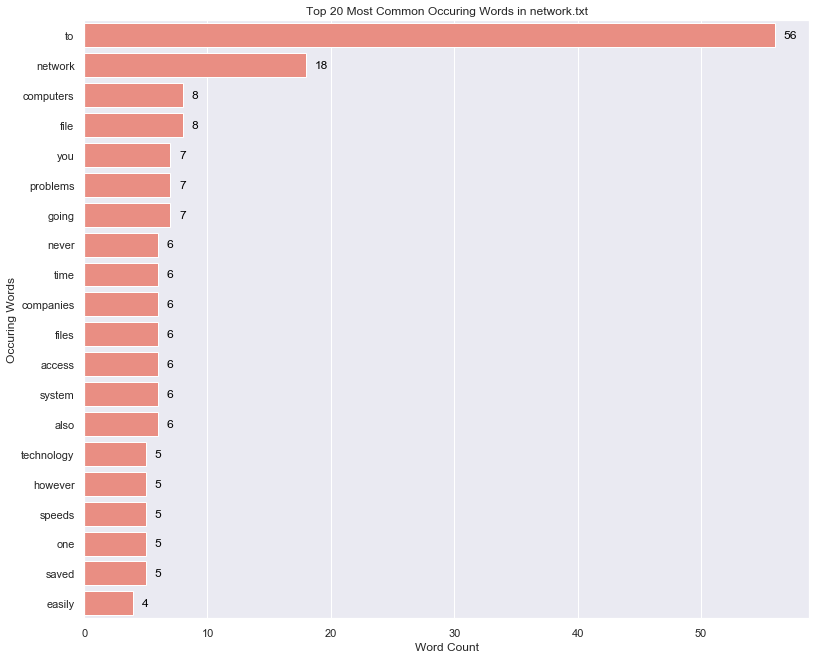

In [12]:
wordcount = top20

%matplotlib inline
plt.figure(figsize=(13,11))
sns.set(style="darkgrid")

ax = sns.barplot(y='word', x='count', data=wordcount.reset_index(), color="salmon")
ax.set(xlabel='Word Count', ylabel='Occuring Words')
labels = dfsorted['count'].head(20)
for i, v in enumerate(labels):
    ax.text(v + 0.7, i + .10, str(v), color='black', fontweight='roman')
ax.locator_params(axis='count', integer=True)
plt.title("Top 20 Most Common Occuring Words in network.txt")
plt.show()

Filtering the network.txt file with the stop.txt stopword file changes the distribution of the words a bit. We're  not using the nltk stopwords in this case so "to", a common stopword was retained and sits at the top position with 56 occurences. 

Every other word after this has way fewer occurences

# 3. Convert Filipino phrases into English

In [12]:
translator = {}
file = open('data/tl-en.txt', 'r', encoding="utf8")
for line in file:
    (eng,span) = line.split()
    translator[eng] = span   

In [30]:
taglish = open('data/Ateneo.txt', 'r').read()
print(taglish)

"Manong, para lang d'yan sa may side."
"Mej hassle naman this rain."
"Ano, bro? Katip later? G?"
"Wait, I'm like gonna dinner lang with the fambam."
"Which car am I gonna take today kaya?"
"Don't make tusok sa fishball muna, it's not lutong yet."
"Kuya magkano po yung neon balls?"
"Pweds ka ba later?"
"Ugh, there's no parking space pa. Eh, I'm late na nga."
"It's like, super intense talaga. As in grabe."
"I'll make paalam pa. You know naman my dad is strict, eh."
"You're, like, so tagal ha."
"Make it fast lang ha?"
"What's wrong with being conyo ba?"


In [14]:
sentence = []
with open('data/Ateneo.txt', 'r') as f:
    for line in f:
        line = line.strip()
        line = line.lower()
        line = line.translate(line.maketrans("", "", string.punctuation)) #removes punctuation
        words = line.split(" ") 
        for word in words: #translates every word in the list by iterating through translator dictionary and replacing
            for key, value in translator.items():
                if word in key:
                    word = word.replace(key,value)
            sentence.append(word)
            
translation = " ".join(sentence)
print("Original text: \n")
print(taglish +"\n")
print("Translated text: \n")
print(translation)

Original text: 

"Manong, para lang d'yan sa may side."
"Mej hassle naman this rain."
"Ano, bro? Katip later? G?"
"Wait, I'm like gonna dinner lang with the fambam."
"Which car am I gonna take today kaya?"
"Don't make tusok sa fishball muna, it's not lutong yet."
"Kuya magkano po yung neon balls?"
"Pweds ka ba later?"
"Ugh, there's no parking space pa. Eh, I'm late na nga."
"It's like, super intense talaga. As in grabe."
"I'll make paalam pa. You know naman my dad is strict, eh."
"You're, like, so tagal ha."
"Make it fast lang ha?"
"What's wrong with being conyo ba?"

Translated text: 

manong to only dyan sa have side mej hassle naman this rain what bro katip later g wait im like gonna dinner only with the fambam which car am i gonna take today so dont make stitch sa fishball first its not cuisine yet brother much po yung neon balls pweds ka ba later ugh theres no parking space pa eh im late na nga its like super intense really as in extreme ill make goodbye pa you know naman my dad i

# 4. Convert English song to Filipino

In [19]:
page = requests.get("https://www.azlyrics.com/lyrics/maroon5/thislove.html") #fetches lyrics from online
soup = BeautifulSoup(page.content, 'html.parser') 
output = soup.find_all('div')[19].get_text()
output.strip()

bestSong = output.translate(str.maketrans('', '', string.punctuation)) #removes punctuation marks
bestSong = bestSong.lower()

In [20]:
sentence = []
undercoverMartyn = io.StringIO(bestSong) #treat string-turned html as files
with undercoverMartyn as file:  
    for line in file:
        line = line.strip() #remove leading spaces
        words = line.split(" ") #convert into a list
        for word in words: 
            for key, value in translator.items(): #iterate through key and value in the dictionary
                if word.endswith('s'): #check for pluralities
                    if word[:-1] in value: #-1 to get rid of the s
                        word = word[:-1].replace(value,key)
                        word = "mga " + word #add mga for filipino plurals
                else:
                    if word in value:
                        word = word.replace(value, key)
                    
            sentence.append(word)
    
translation = " ".join(sentence).strip()
print("Original text: ")
print(bestSong +"\n")
print("Translated text: \n")
print(translation)

Original text: 


i was so high i did not recognize
the fire burning in her eyes
the chaos that controlled my mind
whispered goodbye she got on a plane
never to return again
but always in my heart

this love has taken its toll on me
she said goodbye too many times before
and her heart is breaking in front of me
and i have no choice cause i wont say goodbye anymore

i tried my best to feed her appetite
keep her coming every night
so hard to keep her satisfied
kept playing love like it was just a game
pretending to feel the same
then turn around and leave again
but i know

this love has taken its toll on me
she said goodbye too many times before
and her heart is breaking in front of me
and i have no choice cause i wont say goodbye anymore

ill fix these broken things
repair your broken wings
and make sure everythings alright
my pressure on your hips
sinking my fingertips
into every inch of you
cause i know thats what you want me to do

this love has taken its toll on me
she said goodbye 

# Bonus: Convert Filipino to English

In [17]:
page = requests.get("https://www.azlyrics.com/lyrics/itchyworms/beer.html") #scrapes lyrics from online 
soup = BeautifulSoup(page.content, 'html.parser')
output = soup.find_all('div')[19].get_text()
output.strip()

opm = output.translate(str.maketrans('', '', string.punctuation)) #removes punctuation marks
opm = opm.lower()

In [18]:
sentence = []
beer = io.StringIO(opm) #treat string-turned html as files
with beer as file:     
    for line in file:
        line = line.strip() #remove leading spaces
        words = line.split(" ") #convert into list
        for word in words:
            for key, value in translator.items(): #iterate through key and value in the dictionary
                if word in key:
                    word = word.replace(key, value)
            sentence.append(word)
    
translation = " ".join(sentence).strip()
print("Original text: ")
print(opm +"\n")
print("Translated text: \n")
print(translation)

Original text: 


nais kong magpakalasing
dahil wala ka na
nakatingin sa salamin
at nagiisa
nakatanim pa rin ang gumamelang
binalik mo sakin
nang tayoy maghiwalay
itoy katulad ng damdamin ko
kahit buhusan mo ng beer ayaw pang mamatay

giliw wag mo sanang limutin
ang mga araw na hindi sana naglaho
mga anak at bahay nating pinaplano
lahat ng itoy nawala
nung iniwan mo ako
kaya ngayon

ibuhos na ang beer
sa aking lalamunan
upang malunod na ang puso kong nahihirapan
bawat patak anong sarap
ano ba talagang mas gusto ko
ang beer na to o ang pagibig mo

nais kong magpakasabog
dahil olats ako
kahit ano hihithitin
kahit tambucho
kukuha ako ng beer at ipapakulo sa kaldero
lalanghapin ang usok nito
lahat ay aking gagawin upang hindi ko na isiping nagiisa na ako

ibuhos na ang beer
sa aking lalamunan
upang malunod na ang puso kong nahihirapan
bawat patak anong sarap
ano ba talagang mas gusto ko
ang beer na to o ang pagibig mo

giliw wag mo sanang limutin
ang mga araw na hindi sana naglaho
mga anak